# Introducción al Aprendizaje por Refuerzos

* Introducción
* Librería OpenAI Gym
* Evaluación del rendimiento en un algoritmo de RL
* Híper-parámetros en RL

5to año - Ingeniería en Sistemas de Información

Facultad Regional Villa María

## Introducción

RL, informalmente y a fines prácticos, es una forma de aprendizaje que guía la búsqueda (con parte estocástica) de las acciones para que las mismas tiendan a converger en aquellas que maximicen la recompensa recibida.

En la presente clase vamos a introducir algunas de las herramientas disponibles para trabajar con aprendizaje por refuerzos (RL). A nivel de implementación, a diferencia de lo que sucede con el aprendizaje supervisado y no supervisado, RL resulta más complejo porque su implementación depende mucho del dominio del problema.

Esto se debe a que en RL **no realizamos el aprendizaje a partir de datasets fijos sino por medio de la interacción con el entorno, el cual puede ser real o simulado**. Los datos en RL los obtenemos a partir de las trazas de ejecución

$$T_0 = (s_{00}, a_{00}, r_{01}, s_{01}, a_{01}, \dots, r_{0t}, s_{0t})$$
$$T_1 = (s_{10}, a_{10}, r_{11}, s_{11}, a_{11}, \dots, r_{1r}, s_{1r})$$
$$\dots$$
$$T_N = (\dots)$$



En un problema de RL dado, el entorno puede ser real (en donde las acciones impactan directamente en un sistema real) o bien simulado (en donde el entorno está bajo el control de quién simula).

Para entornos simulados, existen una serie de librerías tanto de entornos como de agentes que nos permiten empezar a entrenar nuestros algoritmos de arranque.

## Librería a usar: Librería OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) (Brockman et. al., 2016) es una librería de OpenAI que ofrece entornos y una interfaz estándar con la cuál probar nuestros agentes. Su objetivo es proveer benchmarks unificados para ver el desempeño de algoritmos en el entorno y así poder saber con facilidad cómo es su desempeño comparado con los demás. Parte de la siguiente sección está basada en la documentación oficial de OpenAI.

Vamos a instalar el gym...

In [1]:
# vamos a instalar el gym

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain

from IPython.display import clear_output

pipmain(['install', 'gym'])
clear_output()

La interfaz principal de los ambientes de gym es la interfaz Env. La misma posee tres métodos principales (info basada en la documentación oficial de Gym):


    reset(self): Reinicia el estado del entorno, a su estado inicial, devolviendo una observación de dicho estado.
    step(self, action): "Avanza" un timestep del ambiente. Devuelve: observation, reward, done, info.
    render(self): Muestra en pantalla una parte del ambiente.
    close(self): Finaliza con la instancia del agente.
    seed(self): Establece la semilla aleatoria del generador de números aleatorios del presente entorno.


Por otra parte, cada entorno posee los siguientes tres atributos principales:

    action_space: El objeto de tipo Space correspondiente al espacio de acciones válidas.
    observation_space: El objeto de tipo Space correspondiente a todos los rangos posibles de observaciones.
    reward_range: Tupla que contiene los valores mínimo y máximo de recompensa posible.

Nota: antes de poder ver video instalar la dependencia ffmpeg. En Linux esto se hace mediante el comando

    sudo apt-get install ffmpeg
    
desde Windows descargarla desde

https://ffmpeg.zeranoe.com/builds/

(las animaciones son a modo ilustrativo, si no se desea instalar la librería se puede directamente eliminar la línea de código donde se llama al método render())

Ejemplo: agente CartPole

In [2]:
import gym
from IPython.display import clear_output

env = gym.make('CartPole-v0')
env.reset()
for _ in range(500):
    env.render()
    observation, reward, done, info = env.step(env.action_space.sample()) # se ejecuta una acción aleatoria
    if done:
        env.reset()
env.close()
clear_output()

Ejemplo: agente Mountain Car

In [3]:
env = gym.make('MountainCar-v0')
observation = env.reset()
for t in range(500):
    env.render(mode='human')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
clear_output()

In [4]:
print(env.action_space)

Discrete(3)


## Híper-parámetros de RL

Los algoritmos de RL, al igual que como sucede con las demás técnicas de ML, poseen híper-parámetros $\Theta$ (no confundir con $\theta$ usado para denotar el umbral de decisión en la clasificación, en el aprendizaje supervisado) que regulan la forma en la que se realiza el aprendizaje. En RL en particular, de $\Theta$ **depende la generación de los datos**, y los mismos sesgan de tal forma la ejecución que la mayoría de las veces no es posible comparar las distintas trazas generadas con distintos $\Theta$.

Optimizar los híper-parámetros $\Theta$ en algoritmos de RL es un desafío considerable, debido a que de los mismos **depende la generación de los datos**, y los híper-parámetros sesgan de tal forma la ejecución que la mayoría de las veces no es posible comparar las distintas trazas generadas con distintos $\Theta$.

En contrapartida, en el aprendizaje supervisado y no supervisado, al aplicar un algoritmo de ML los datos ya están generados de antemano, siendo el algoritmo (informalmente) una forma de obtener conocimiento a partir de los datos crudos.

Si además también consideramos que en RL, la generación de una traza es algo computacionalmente costoso (excepto en ejemplos pequeños como el mostrado en esta clase), la selección de $\Theta$ debe hacerse muy cuidadosamente. En la práctica suele hacerse manualmente o bien alguna variante de random search (grid search cuando el ejemplo es computacionalmente demandante es inviable).

El gran problema de ambos métodos es que actualmente no existe un esquema formal para aprovechar el conocimiento adquirido de los $\theta$ descartados, quedando la optimización sujeta a prueba y error o reglas empíricas. En RL particularmente esto no es un dato menor, porque al ser tan sensibles los modelos a sus híper-parámetros, una nueva simulación con un ligero cambio de éstos puede generar resultados totalmente distintos.

[Ejemplo de algoritmo propuesto para optimización de híper-parámetros en RL (por los docentes de la cátedra)](https://clei.org/cleiej/index.php/cleiej/article/view/33/44), en donde se utiliza una técnica llamada optimización Bayesiana para realizar la búsqueda de híper-parámetros $\Theta$ basado en anteriores $\Theta$ con los que se ha entrenado el agente.

# Ejemplo de Q-Learning en agente FrozenLake (con slippery = False)

![Frozen Lake](images/frozen_lake.png)

donde S= starting point (safe), F= frozen surface (safe), H=hole (fall to your doom), G= goal (where the frisbee is located)

(imagen de https://www.analyticsindiamag.com/openai-gym-frozen-lake-beginners-guide-reinforcement-learning/)

Descripción del entorno:

Acciones:

* ^ - Arriba
* v - Abajo
* \> - Derecha
* < - Izquierda

Función de recompensa:

* $+1$ por llegar a estado Goal
* $0$ en todos los demás estados


Función de transición:

* Con el atributo slippery en False cada acción mueve el agente en tal sentido con una probabilidad del 100,0%. Con slippery en True, el 66,6% de las veces el agente se moverá a la casilla deseada, mientras que el 33,3% de las veces el agente se moverá a otra posición, determinada aleatoriamente.


Nota: slippery es un atributo en el entorno FrozenLake que hace que el hielo sea o no resbaladizo, haciendo que el 33% de las veces la acción ejecutada sea aleatoria. En el agente implementado de este notebook el mismo se desactivó para poder analizar mejor el desempeño del agente.

### Ejecución de agente aleatorio en FrozenLake

In [5]:
import time

env = gym.make('FrozenLake-v0')
env.reset()
for _ in range(10):
    clear_output()
    env.render()
    time.sleep(1)
    observation, reward, done, info = env.step(env.action_space.sample()) # se ejecuta una acción aleatoria
    if done:
        env.reset()
env.close()

  (Up)
SFFF
FHFH
FFFH
HFFG


### Configuración básica

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from frozen_lake_agent import FrozenLakeAgent as fP
import itertools

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 0.9
epsilon = 0.1
tau = 25
is_slippery = False
cutoff_time = 100  # el tiempo de corte del agente son 100 time-steps, por lo que mantenemos el máximo (es posible bajarlo)

# se declara una semilla aleatoria
random_state = np.random.RandomState(20)

# instanciamos nuestro agente
agent = fP.FrozenLakeAgent()
agent.random_state = random_state

agent.set_hyper_parameters({"alpha": alpha, "gamma": gamma, "epsilon": epsilon})

# declaramos como True la variable de mostrar video, para ver en tiempo real cómo aprende el agente. Borrar esta línea
# para acelerar la velocidad del aprendizaje
agent.display_video = True

# establece el tiempo de
agent.set_cutoff_time(cutoff_time)

### Inicialización y ejecución del agente

In [7]:
# inicializa el agente
agent.init_agent(is_slippery=is_slippery)  # slippery es establecido en False por defecto

# reinicializa el conocimiento del agente
agent.restart_agent_learning()

# se realiza la ejecución del agente
avg_steps_per_episode = agent.run()

### Análisis de la ejecución del agente

#### Análisis de convergencia

* A diferencia de lo que sucede en el aprendizaje supervisado, en el aprendizaje por refuerzos el rendimiento se evalúa por el retorno de una función específica que es la función de recompensa. 

* En la práctica, el agente puede aprender directamente a partir de la función de recompensa externa (que proviene desde el entorno). Si esta es escasa (*sparse*), como suele suceder en muchos problemas, es común complementar la misma con una función interna creada por diseño

* Esto se hace a modo de dirigir el agente hacia lo que por diseño se considera mejor, en nuestro ejemplo podría ser con una recompensa de $-1$ cada vez que el agente llega a un estado H, este tipo de asignaciones *hard-coded* se conoce en este contexto como *reward shaping*.

* **Se recomienda tener cuidado con esto, porque muchas veces el reward shaping dirige al agente hacia un comportamiento indeseado, en el cuál simplemente "gamifica" las recompensas intermedias**. Un enfoque alternativo: [Curiosity-driven Exploration by Self-supervised Prediction](https://github.com/pathak22/noreward-rl) 

* Como el objetivo de RL es maximizar la recompensa obtenida, es posible utilizar la información sobre la obtención de la recompensas en cada time-step o episodio para evaluar el rendimiento parcial del agente (esto depende mucho de la particularidad de la distribución de la recompensa para el problema tratado).

Para analizar la ejecución del agente, vamos a ver cómo se desempeñó el mismo en dos aspectos:

* Recompensa obtenida en cada episodio: nos dirá cuánta recompensa obtuvo el agente en cada uno de los episodios. Con esta medida sabremos al instante si el agente pudo llegar al estado Goal en cada uno de los episodios, habiendo recibido una recompensa de $1$, donde en caso contrario habrá recibido una recompensa de $0$.

* Pasos transcurridos en cada episodio: indicará cuántos pasos le ha llevado al agente la ejecución del episodio. Si bien este indicador no garantiza que el agente haya llegado al estado G, indicará cómo el mismo tiende a realizar su aprendizaje (si aprende debería tender a bajar la cantidad de pasos por cada episodio).

Veamos recompensa por episodio (recordar que en este entorno cada paso otorga una recompensa de $0$ excepto en aquellos en los que se arriba al estado Goal, donde la recompensa es de $1$)

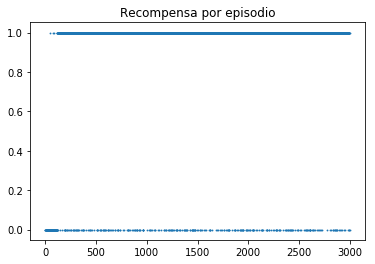

In [8]:
episode_rewards = np.array(agent.reward_of_episode)
plt.scatter(np.array(range(0, len(episode_rewards))), episode_rewards, s=0.7)
plt.title('Recompensa por episodio')
plt.show()

Veamos pasos por episodio

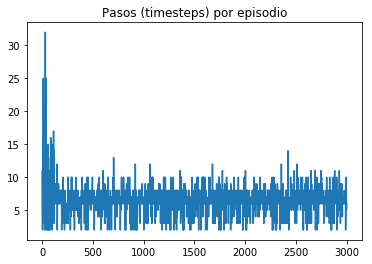

In [9]:
# se muestra la curva de aprendizaje de los pasos por episodio
episode_steps = np.array(agent.timesteps_of_episode)
plt.plot(np.array(range(0, len(episode_steps))), episode_steps)
plt.title('Pasos (timesteps) por episodio')
plt.show()

Como vemos, los gráficos arrojan algo de información pero a su vez oscilan demasiado. Para contrarrestar esto procedemos a suavizarlos, utilizando la suma acumulada de recompensa (o pasos) por episodio y dividiéndola por la cantidad de episodios:

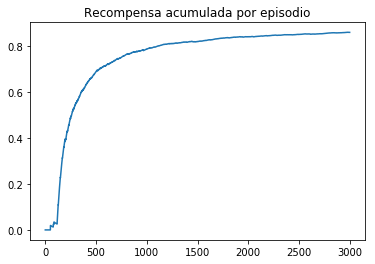

In [10]:
# se suaviza la curva de convergencia
episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
acumulated_rewards = np.cumsum(episode_rewards)

reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]

plt.plot(reward_per_episode)
plt.title('Recompensa acumulada por episodio')
plt.show()

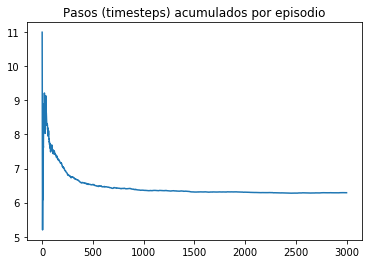

In [11]:
# se suaviza la curva de aprendizaje
episode_number = np.linspace(1, len(episode_steps) + 1, len(episode_steps) + 1)
acumulated_steps = np.cumsum(episode_steps)

steps_per_episode = [acumulated_steps[i] / episode_number[i] for i in range(len(acumulated_steps))]

plt.plot(steps_per_episode)
plt.title('Pasos (timesteps) acumulados por episodio')
plt.show()

#### Análisis de matriz de valor y política óptima

Siendo que este es un ejemplo tabular y de pocos estados / acciones, es posible realizar un análisis de convergencia desde otro punto de vista: desde el valor que alcanzó cada estado al finalizar la ejecución del agente y la acción que ejecutaría al llegar a cada estado\*. Ambos nos brindarán información sobre la convergencia alcanzada por el agente.

Teniendo los valores de $Q(s,a)$ para cada par estado-acción, el valor de cada estado se calcula a través de

$$V(s) = \sum_{a} \pi(a \mid s) Q(s, a) $$

donde $\pi(a \mid s)$ es la probabilidad de tomar la acción $a$ siendo que el agente se encuentra en el estado $s$. Siguiendo la política $\epsilon$-greedy, donde como ejemplo $\epsilon = 0.25$, $\pi(a \mid s)$ está dado por:


$$ \pi(a \mid s) = \begin{cases}
                        0.75 + \frac{0.25}{4} & \text{si a es la mejor acción}\\
                        0.25 - \frac{0.25}{4} & \text{en caso contrario}
                   \end{cases}
$$


Notar que la fracción $\frac{0.25}{4}$ se añade pues se tiene en cuenta que $a$ puede haber sido elegida aleatoriamente al ejecutar una acción exploratoria. Un criterio distinto podría ser que en la acción exploratoria se excluya a la mejor acción.


(\*) Tener en cuenta que este análisis se hace principalmente con fines educativos, para entornos más complejos el mismo puede no ser factible. En tales casos, un análisis alternativo podría consistir en hacer que el agente ejecute su política para la que fue entrenado, para hacer una evaluación a partir del comportamiento del mismo.

Por otra parte, la acción óptima para cada estado se obtiene simplemente consultando el $Q(s,a)$ que mayor valor arroja. Gráficamente:

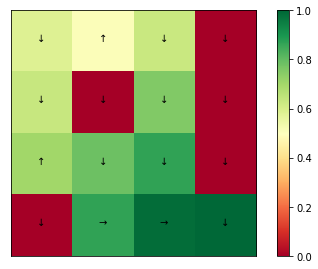


 Matriz de valor (en números): 

 [[0.58473272 0.51024546 0.63217969 0.        ]
 [0.63494077 0.         0.75642609 0.        ]
 [0.70548975 0.7859025  0.86895    0.        ]
 [0.         0.87096289 0.988      1.        ]]


In [12]:
# se procede con los cálculos previos a la graficación de la matriz de valor
value_matrix = np.zeros((4, 4))
for row in range(4):
    for column in range(4):

        state_values = []

        for action in range(4):
            state_values.append(agent.q.get((row * 4 + column, action), 0))

        maximum_value = max(state_values)  # como usamos epsilon-greedy, determinamos la acción que arroja máximo valor
        state_values.remove(maximum_value)  # removemos el ítem asociado con la acción de máximo valor

        # el valor de la matriz para la mejor acción es el máximo valor por la probabilidad de que el mismo sea elegido
        # (que es 1-epsilon por la probabilidad de explotación más 1/4 * epsilon por probabilidad de que sea elegido al
        # azar cuando se opta por una acción exploratoria)
        value_matrix[row, column] = maximum_value * (1 - epsilon + 1/4 * epsilon)

        for non_maximum_value in state_values:
            value_matrix[row, column] += epsilon/4 * non_maximum_value

# el valor del estado objetivo se asigna en 1 (reward recibido al llegar) para que se coloree de forma apropiada
value_matrix[3, 3] = 1

# se grafica la matriz de valor
plt.imshow(value_matrix, cmap=plt.cm.RdYlGn)
plt.tight_layout()
plt.colorbar()

fmt = '.2f'
thresh = value_matrix.max() / 2.
for row, column in itertools.product(range(value_matrix.shape[0]), range(value_matrix.shape[1])):

    arrow_direction = '↓'

    left_action = agent.q.get((row * 4 + column, 0), 0)
    down_action = agent.q.get((row * 4 + column, 1), 0)
    right_action = agent.q.get((row * 4 + column, 2), 0)
    up_action = agent.q.get((row * 4 + column, 3), 0)

    best_action = down_action

    if best_action < right_action:
        arrow_direction = '→'
    if best_action < left_action:
        arrow_direction = '←'
    if best_action < up_action:
        arrow_direction = '↑'

    # notar que column, row están invertidos en orden en la línea de abajo porque representan a x,y del plot
    plt.text(column, row, arrow_direction,
             horizontalalignment="center")

plt.xticks([])
plt.yticks([])
plt.show()

print('\n Matriz de valor (en números): \n\n', value_matrix)

In [13]:
# destrucción del agente
agent.destroy_agent()

## Trabajo práctico 5

Para el presente lab vamos a utilizar la clase FrozenLakeAgent, llamada desde el presente notebook, y el script *frozenlake_main_script*. Los mismos se presentan como herramientas para resolver los ejercicios por lo se permite, para la resolución de los mismos, modificarlos o reemplazarlos por sus propias implementaciones. Presentan la siguiente funcionalidad:

> frozenlake_main_script

Script que crea y define la configuración inicial del agente de RL de tipo FrozenLake, creando la instancia de FrozenLakeAgent.

> FrozenLakeAgent

Clase que implementa la interfaz con OpenAIGym, creando el entorno FrozenLake y aplicando acciones sobre el mismo. Adicionalmente provee una interfaz para llamar y correr el agente RL.

Adicionalmente, en la clase también se implementa el algoritmo QLearning, lo cual involucra el guardado de los valores de Q en un diccionario, la selección de acciones (mediante $choose\_action$) y la actualización de los valores de Q (mediante $learn$).

### Ejercicios Básicos

1. Implementar algoritmo SARSA y compararlo con Q-Learning, en la curva de convergencia de la recompensa. 

2. Realizar una breve descripción analizando cómo difieren en la curva de aprendizaje los distintos valores de los híper-parámetros $\alpha$, $\epsilon$ y $\gamma$.

3. Evaluar cómo cambia el desempeño de los algoritmos implementados con el entorno FrozenLake con Slippery = True. ¿Cómo se comparan Q-Learning y SARSA? ¿Cómo es esta comparación de acuerdo a los valores de sus híper-parámetros?

### Ejercicios Complementarios

1. Dado el agente de Q-Learning en el entorno FrozenLake, implementar la política Softmax, dada por
$$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{a'}e^{Q(s,a')/\tau}}$$ Mostrar la convergencia alcanzada para distintos valores de $\tau$ en la curva de convergencia de la recompensa. Opcional: compararlos también en la matriz de valor, para lo cuál debe adaptarse la matriz de valor a la política Softmax (actualmente la misma está de acuerdo a la política epsilon-greedy).

2. Modificar la función de recompensa de modo tal que se penalice caer al agua o bien que se penalice cada time-step (o algún criterio similar). Analizar cómo difiere la convergencia en tales casos (comparando Q-Learning con SARSA).

### Ejercicios Extra

1. Utilizar la versión más grande del FrozenLake, que es una grilla de tamaño 8x8 (solamente esta grilla o ambas grillas a modo de comparación). Para usarla, se debe modificar la variable en *register* del método *init_agent* de '4x4' a 8x8. Mostrar la convergencia alcanzada por los algoritmos en el nuevo entorno.

Nota: Para visualizar los distintos aspectos del entorno frozen lake que se pueden cambiar en la función Register, seguir este link
https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py

**Importante, recomendación general**: No se sugiere hacer este TP desde jupyter notebook/lab sino desde un IDE estilo Pycharm, debido a que los algoritmos de RL suelen requerir un debug paso a paso, tanto para corregir errores como para entender mejor cómo funcionan los mismos.

### Links adicionales para aquellos interesados

* [Libro de Sutton y Barto, libro principal de RL](http://www.incompleteideas.net/book/RLbook2018.pdf)

* [Muy buen curso de RL, por David Silver](https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLzuuYNsE1EZAXYR4FJ75jcJseBmo4KQ9-)

* [Paper Human-Level Control through Deep Reinforcement Learning (RL para juegos de Atari)](https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf) y su [implementación en Python](https://github.com/devsisters/DQN-tensorflow). El algoritmo también puede verse en el paper anterior, en donde se presenta el RL profundo, [Playing Atari with Deep Reinforcement Learning](https://arxiv.org/pdf/1312.5602.pdf).

* [Paper donde se muestran todos los métodos de Deep RL (2017) - Deep Reinforcement Learning: An Overview](https://arxiv.org/pdf/1701.07274.pdf).

* [Repo para ver algoritmos implementados de RL, junto con ejercicios y soluciones de Sutton, Barto y curso de Silver](https://github.com/dennybritz/reinforcement-learning).

* Entradas de blog interesante que analizan [OpenAI Five](https://medium.com/@evanthebouncy/understanding-openai-five-16f8d177a957) y [AlphaStar/OpenAI y su avance en la IA](https://www.skynettoday.com/editorials/openai-dm). Bonus: [arquitectura usada por OpenAI para entrenar su agente de RL](https://d4mucfpksywv.cloudfront.net/research-covers/openai-five/network-architecture.pdf)

Fecha de entrega: **28/6/2019 23:59**

Se permite realizar el trabajo en grupos de dos. La reutilización del código del notebook está permitida (por ejemplo para confeccionar gráficos).